In [23]:
!pip install seaborn

In [24]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Lets load the Diabetes dataset

In [25]:
diabetes = datasets.load_diabetes()

In [26]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [27]:
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

## Preparing The Dataset

In [28]:
df = pd.DataFrame(X, columns=feature_names)
df['Progression'] = y

In [29]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [30]:
df = df.drop(["sex"], axis=1)
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   bmi          442 non-null    float64
 2   bp           442 non-null    float64
 3   s1           442 non-null    float64
 4   s2           442 non-null    float64
 5   s3           442 non-null    float64
 6   s4           442 non-null    float64
 7   s5           442 non-null    float64
 8   s6           442 non-null    float64
 9   Progression  442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [32]:
## Check the missing Values
df.isnull().sum()

age            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

## Train Test Split


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)

In [36]:
X_test=scaler.transform(X_test)

## Model Training

In [37]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [38]:
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
## print the coefficients and the intercept
print(regression.coef_)

[  1.35246724 -12.45426893  26.21004615  18.61443344 -43.26039442
  24.2556288    5.73862584  13.96342685  31.57521526   1.98339354]


In [40]:
print(regression.intercept_)

153.90291262135923


In [43]:
### Prediction With Test Data
reg_pred = regression.predict(X_test)

## Assumptions

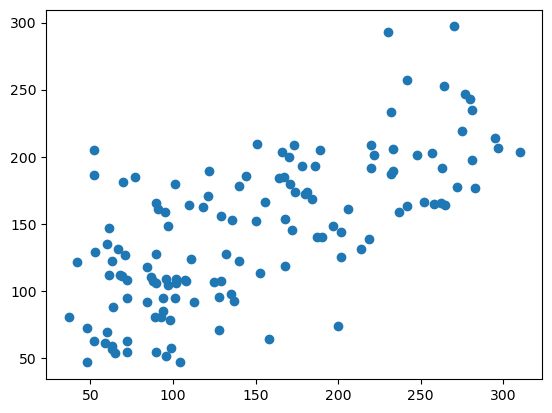

In [44]:
## plot a scatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [45]:
## Residuals
residuals = y_test-pred

In [46]:
residuals

array([  80.53029969, -111.10052342,   76.65599096,  -62.75977277,
        -12.8830531 ,   -7.89830434,  -15.26463123,   94.23830682,
          9.01450294,  -13.15960992,   -0.4855284 ,   85.86764892,
         41.59257498,   90.86102646,   37.2188158 ,  -64.00472765,
         80.70210028,   11.47092339,  -29.66656381,   55.50014366,
        106.76328683,  -24.00656925,   57.34891541,   45.07766573,
        -26.81266751,  -44.81022205,   71.06864294, -107.72924276,
          1.37079171,   -1.26566599,  -38.14743952,   21.64934995,
        -37.72125745,  -20.04205666,    7.76200103,   43.48451137,
        -79.83265708,  -33.75339206,   26.32049694,    4.42436599,
        -24.55421321,    0.72428895,  -10.15280313,   14.70660016,
        -75.19282154,  -10.95752038,  126.41090551,  -23.05656189,
         35.50276646,   93.11079368,  -16.49472803,   94.1125435 ,
        -42.4354561 ,  -36.34936269,   -8.96973311,  -63.70054112,
        -23.04833555,  -58.68990406,   49.62643481,   -9.69946

C:\Users\Levi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


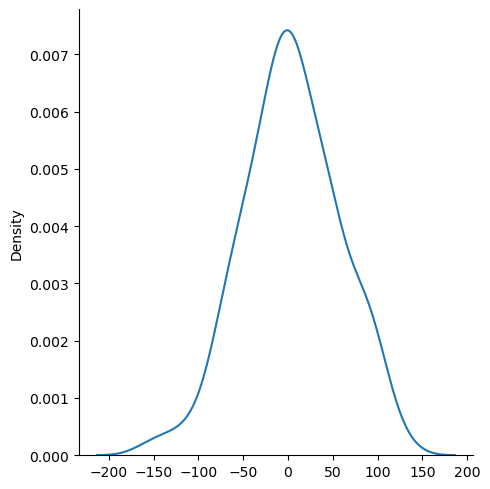

In [47]:
## Plot this residuals 

sns.displot(residuals, kind="kde")

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

41.91937845679274
2821.750981001311
53.120156070942706


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [49]:
from sklearn.metrics import r2_score
score=r2_score(y_test, pred)
print(score)

0.4772897164322617


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [50]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.43444461122179134

## New Data Prediction

In [51]:
new = diabetes.data[0].reshape(1, -1)

In [52]:
new_scaled = scaler.transform(new)

In [53]:
pred_new = regression.predict(new_scaled)

In [54]:
pred_new[0]

209.68990406335996

## Pickling The Model file For Deployment

In [55]:
import pickle

In [56]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [57]:

pickle.dump(scaler,open('scaling.pkl','wb'))

In [58]:
var = {
    "CRIM": 0.00632,
    "ZN": 18,
    "INDUS": 2.31,
    "CHAS": 0,
    "NOX": 0.538,
    "RM": 6.575,
    "AGE": 65.2,
    "DIS": 4.09,
    "RAD": 1,
    "TAX": 296,
    "PTRATIO": 15.3,
    "B": 396.9,
    "LSTAT": 4.98
}

In [59]:
import json
import pandas as pd